In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings("ignore") # ignoring wranings

In [ ]:
#reading the dataset

Health_data = pd.read_excel("/content/Health_insurance_cost.xlsx")
Health_data_copy = Health_data.copy() #creating a copy of raw dataset

# Exploratory Data Analysis

## Data Inspection

In [ ]:
# Exploring the number of observations and variables
num_rows, num_cols = Health_data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1338
Number of columns: 7


In [ ]:
# Exploring the DataTypes of the Dataset.
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


*   Gender, smoking_status and location (3) are categorical data.
*   Age, BMI, Children & healt_insurance_price are numeric data.



In [ ]:
# Data Sampling - exploring the top 5 records
Health_data.head(5)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Data Sampling - exploring last 5 records
Health_data.tail(5)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


* There are missing values in the form of NaN.
* In our dataset age, gender, BMI, Children, smoking_status, location are Independent Variables.
* health_insurance_price is dependent variable. This variable is dependent on other Independent Variables.
* Since health_insurance_price is a Continous Dependent Variable, therefore, this is Regression Problem.

## Descriptive Statistics

In [ ]:
#getting ststistical summary of dataset
Health_data.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


As the minimum and maximum values are possible, the data seems genuine and good. There are no visible outliers.

Some predictions that we can make using this statistical summary is as follows: 

*   We identify that individuals purchasing health insurances are between 18 to 64 years of age.
*   We observe that out of the 4 unique locations, the best selling location is Southeast with a frequency of 364
*   We observe that the price if insurance is increasing based on the age of teh individual.
*   We can predict that the dataset is skewed towards males, with more than 50% of the observations being male.

## Data Cleaning

Identifying Duplicates

In [ ]:
# Identifying and dropping duplicates
Health_data.drop_duplicates()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


We observe that there are no duplicates in the dataset

Identifying Null Values

In [ ]:
# Identifying the total number of null	values present in each	feature
Health_data.isna().sum()	

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

## Handling Null Values

In [ ]:
# We have null values in three features Age , BMI and health_insurance_price.

## health_insurance_price is our Target Variable , so we can't impute null values. We have to remove it.
Health_data[Health_data['health_insurance_price'].isnull()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1281,47.0,female,27.645,2,yes,northwest,NaN
1312,34.0,male,42.900,1,no,southwest,NaN


In [ ]:
#dropping both records

Health_data.dropna(subset=['health_insurance_price'], inplace=True)


In [ ]:
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1308 non-null   float64
 1   gender                  1336 non-null   object 
 2   BMI                     1313 non-null   float64
 3   Children                1336 non-null   int64  
 4   smoking_status          1336 non-null   object 
 5   location                1336 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.5+ KB


We are now left with only 1336 records.

In [ ]:
Health_data.isna().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64

<Axes: >

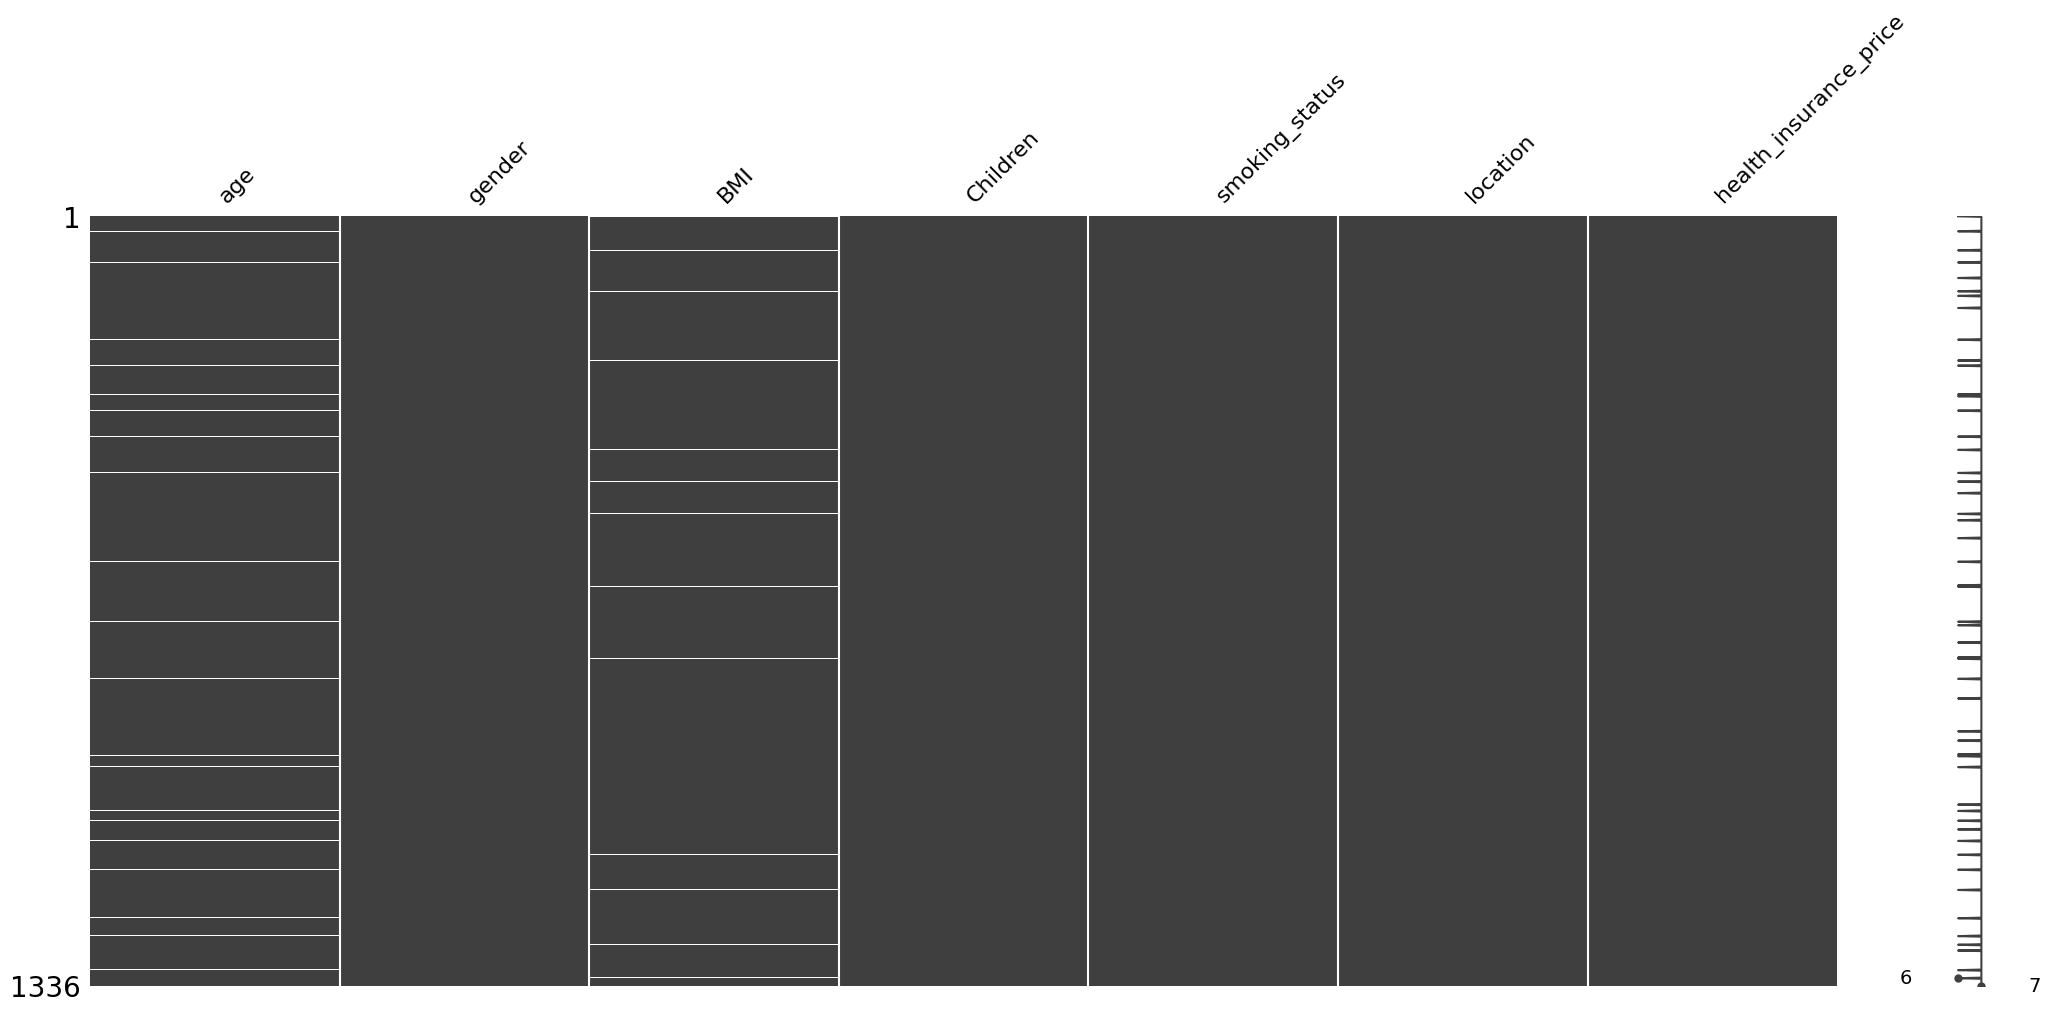

In [ ]:
# visualization of missing values
import missingno as msno
msno.matrix(Health_data)

<Axes: >

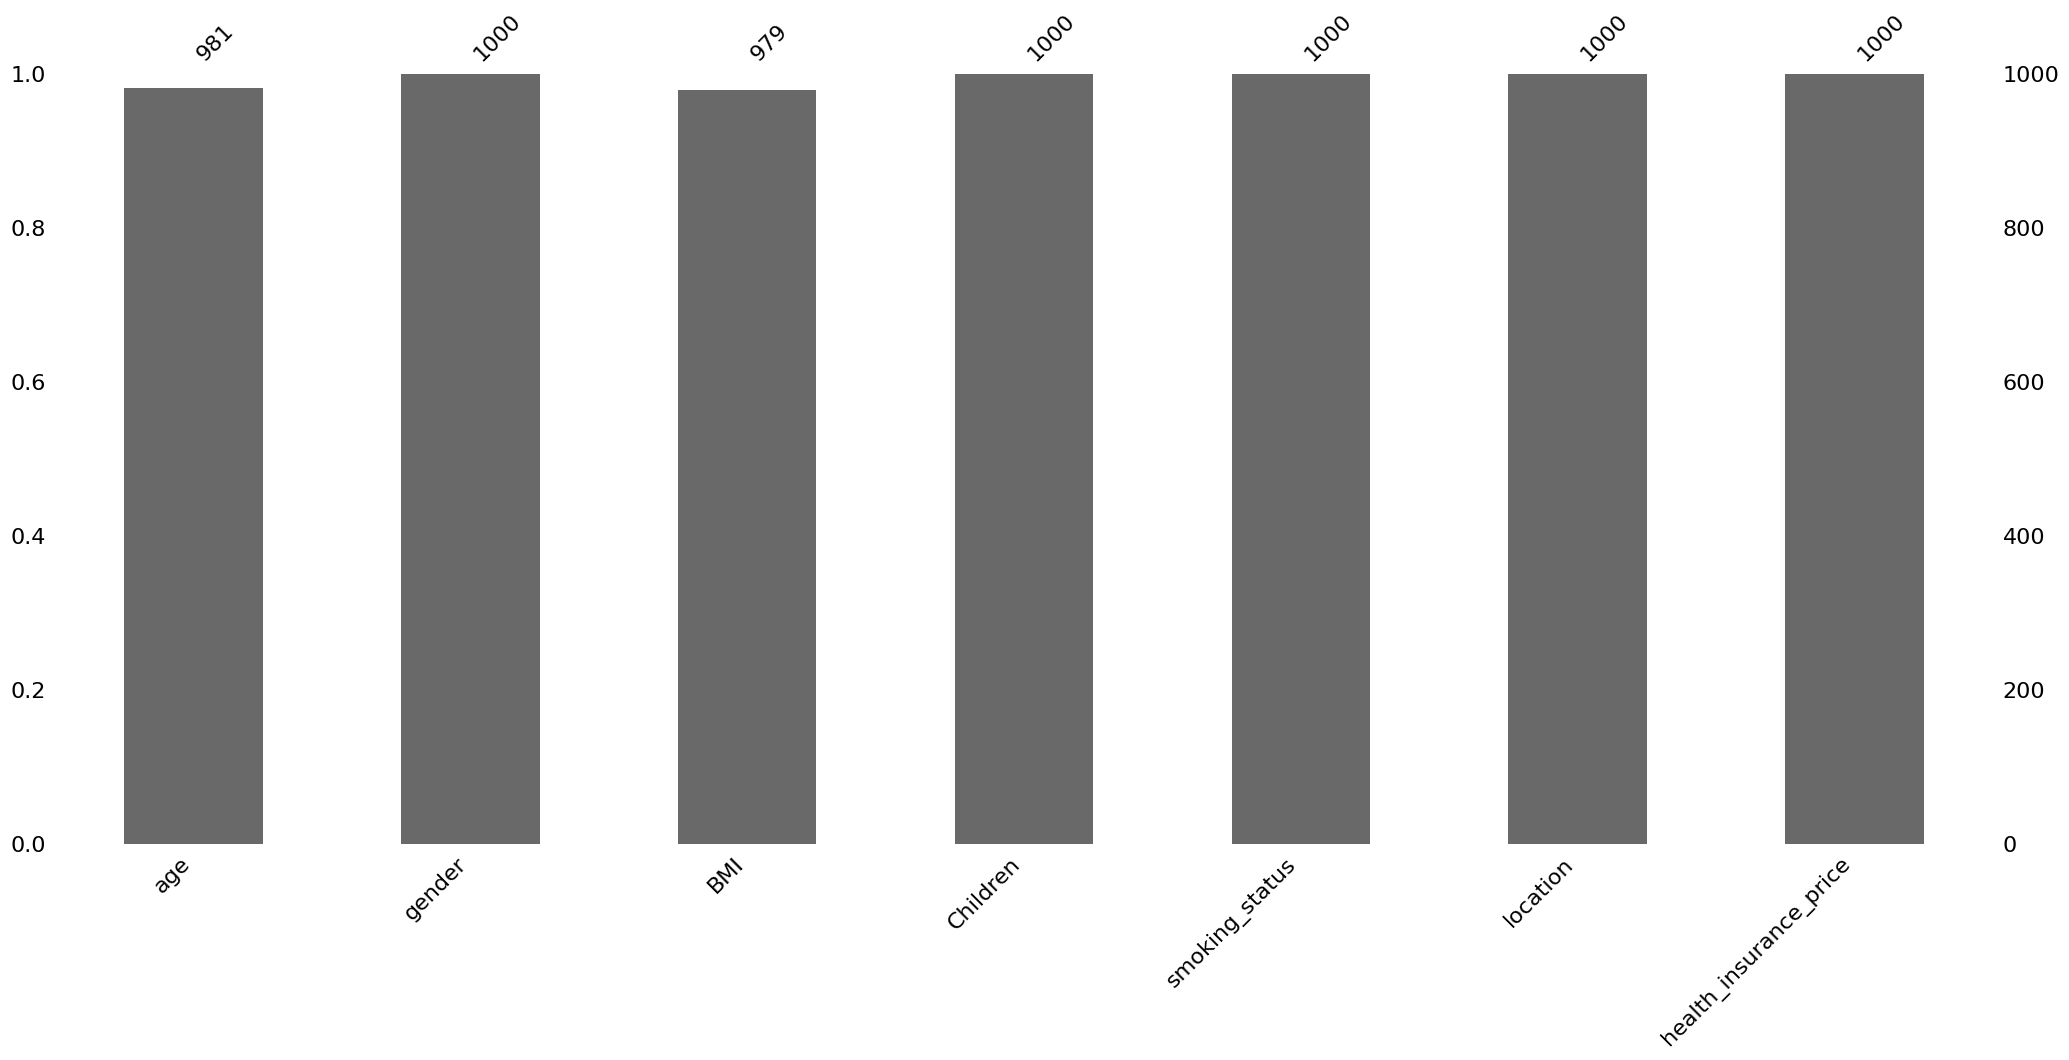

In [ ]:
# msno.bar is a simple visualization of null values by column:
msno.bar(Health_data.sample(1000))

<Axes: >

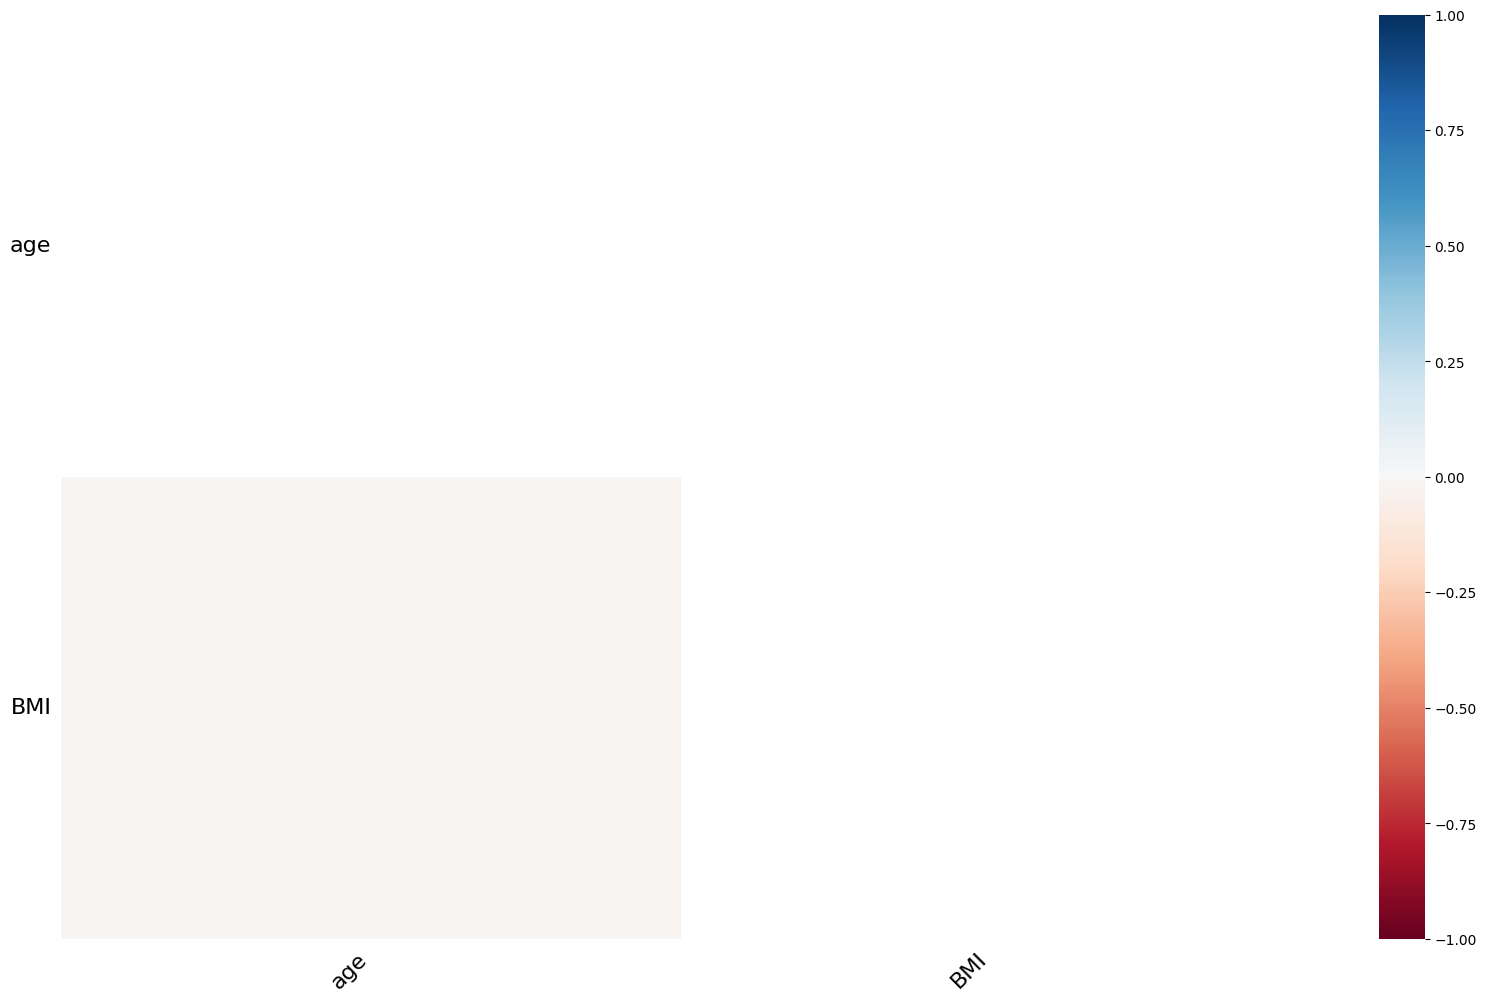

In [ ]:
# To check the missing no. correlation heatmap measures nullity correlation.
msno.heatmap(Health_data)

## Converting Categorial Columns into numerical Columns
we have 3 features with String datatype , As ML Algoriths understand only numerical columns so we need to convert these features into numerical data.

In [ ]:
#fetching uniques values of features
print(Health_data['gender'].unique())
print(Health_data['smoking_status'].unique())
print(Health_data['location'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
#Encoding Gender column
Health_data['gender'] = Health_data['gender'].map({'female' : 0 , 'male' : 1}) 
#Encoding Smoking_status Column
Health_data['smoking_status'] = Health_data['smoking_status'].map({'no' : 0 , 'yes' : 1}) 
#Encoding Location Column
Health_data['location'] = Health_data['location'].map({'southwest' : 1 , 'southeast' : 2 , 'northwest' : 3 , 'northeast' : 4})

In [ ]:
Health_data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,1,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,3,21984.47061
4,32.0,1,28.880,0,0,3,3866.85520


## Univariate Analysis

In [ ]:
# Histogram demonstrating age distribution of customers within the dataset
fig = px.histogram(Health_data, x="age", nbins=50, width=800, height=400, labels={"age": "Age Distribution"})
fig.show()

People applying for Health Insurance is highest in number with age group 18-19

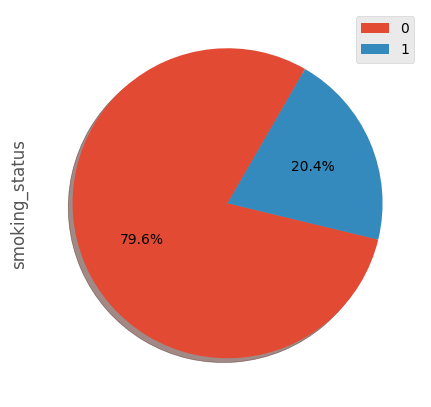

In [ ]:
# Pie Chart demonstrating percentage of smoker v/s non-smoker customers 
plt.style.use('ggplot')
plt.figure(figsize = [5,6])
Health_data['smoking_status'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
plt.legend()

*   Maximum individuals applying for health insurance are non-smokers. Roughly 80%



In [ ]:
# Histogram to demostrate gender distribution within the dataset
fig = px.histogram(Health_data, x="gender", width=600, height=400, labels={"gender": "Gender Distribution"})
fig.show()

In [ ]:
# Histogram demonstrating distribution of BMI of customers
fig = px.histogram(Health_data, x="BMI" ,width=800, height=400, labels={"BMI": "BMI of Customers"})
fig.show()

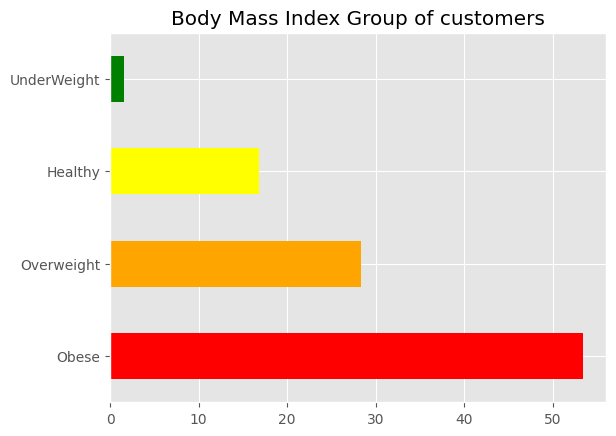

In [ ]:
# Bargraph demonstrating BMI range of customers
Health_data_copy['BMI_range']= pd.cut(Health_data_copy['BMI'], [0,18.5,24.9,29.9,100],labels=['UnderWeight','Healthy','Overweight','Obese'])
(Health_data_copy['BMI_range'].value_counts(normalize=True)*100).plot.barh(title ="Body Mass Index Group of customers", color=['red', 'orange', 'yellow', 'green', 'blue' ])
plt.xticks(rotation=0)
plt.show()



*   Normal BMI Range = 18.5 - 24.9
*   The Overweight and Obese Group are the largest group applying for Health Insurance.



In [ ]:
# Histogram demonstrating distribution of children among customers
fig = px.histogram(Health_data, x="Children", width=800, height=400, labels={"Children": "Number of Childrens"})
fig.show()

Customers Applying for Health Insurance who have 0 CHILDREN are maximum

In [ ]:
# Location-wise distribution of customers
fig = px.histogram(Health_data, x="location", width=400, height=400, labels={"location": "Location of Customers"})
fig.show()

Maximum customers are from Southeast location

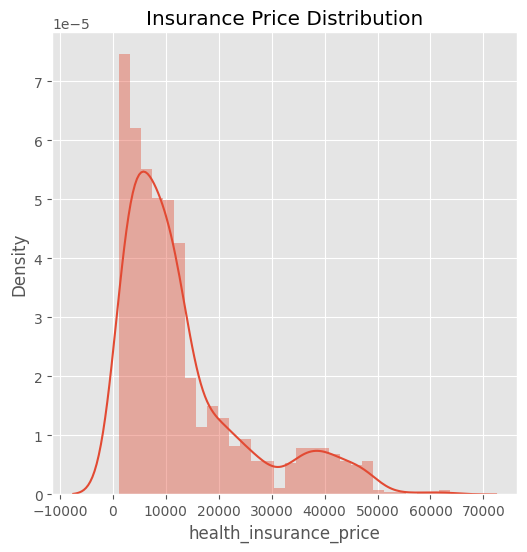

In [ ]:
# distribution of insurance prices
plt.figure(figsize=(6,6))
sns.distplot(Health_data['health_insurance_price'])
plt.title('Insurance Price Distribution')
plt.show()



*   We have a lot of data distributed between 10000 and we have very little values in 30,000 - 40,000.



## Detecting Outliers

In [ ]:
fig = px.box(Health_data, y="age", width=400, height=300)
fig.show()

Data is normally distributed. Min - 18 & Max - 64

In [ ]:
fig = px.box(Health_data, y="BMI", width=400, height=300)
fig.show()

There are outliers in BMI Data , but these are not incorrect data as these are possible so we will keep as it is.

In [ ]:
fig = px.box(Health_data, y="health_insurance_price", width=400, height=300)
fig.show()

There are outliers here as well , but again these are possible data.

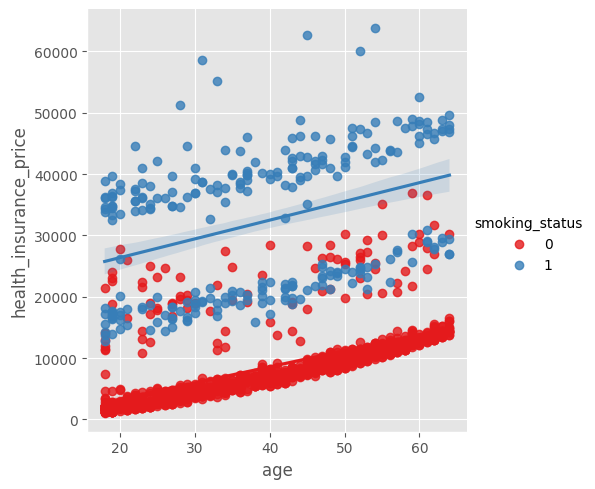

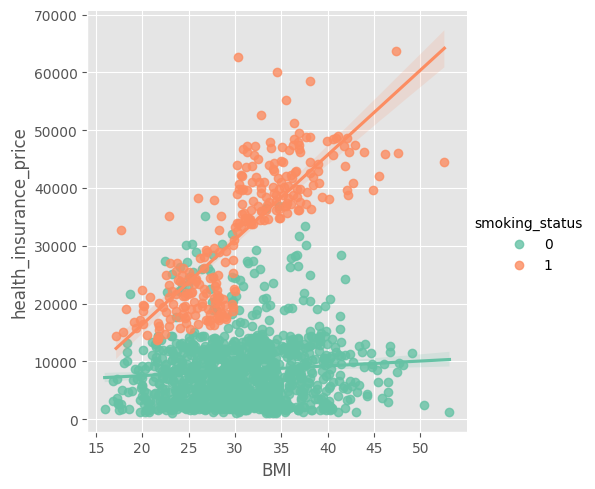

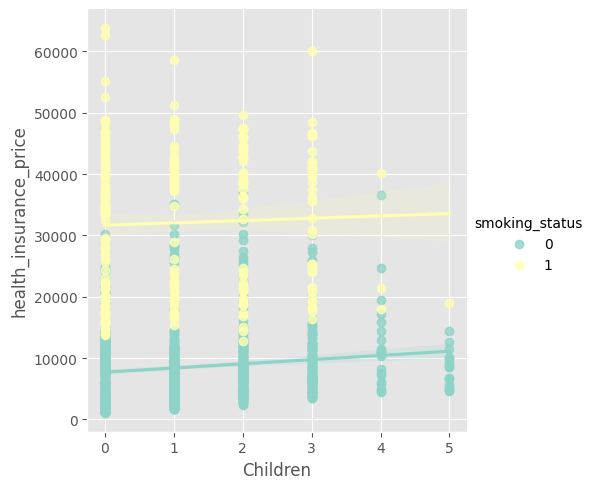

In [ ]:
ax = sns.lmplot(x = 'age', y = 'health_insurance_price', data=Health_data, hue='smoking_status', palette='Set1')
ax = sns.lmplot(x = 'BMI', y = 'health_insurance_price', data=Health_data, hue='smoking_status', palette='Set2')
ax = sns.lmplot(x = 'Children', y = 'health_insurance_price', data=Health_data, hue='smoking_status', palette='Set3')

As we can see , Smoking has serious effect on Health_insurance_price.

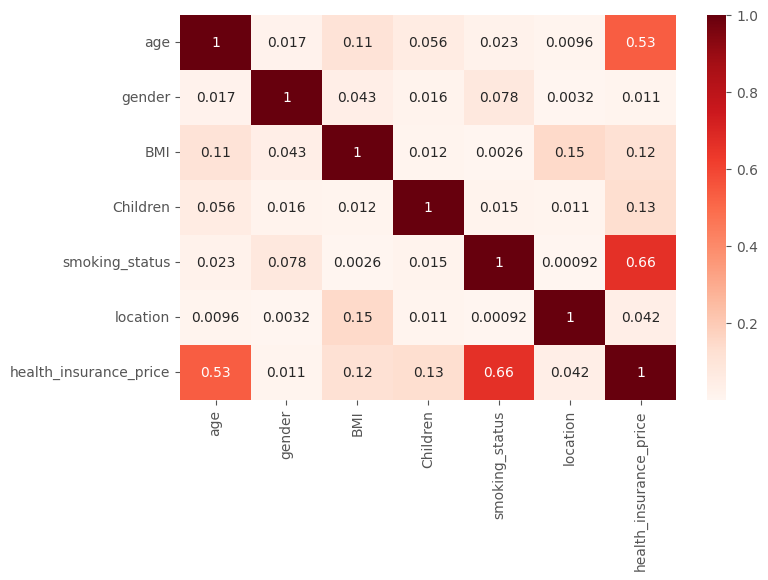

In [ ]:
# Creating a correlation matrix heatmap to see the correlation coefficient for above pair of features

corr_matrix = Health_data.corr(method='spearman').abs()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show()

We can see that Health Insurance Price are strongly influenced by customer's age and if the person is a smoker or not

In [ ]:
Health_data.groupby("smoking_status").agg({"health_insurance_price": "mean"})

,health_insurance_price
smoking_status,
0,8437.935287
1,32077.757594


We can see a huge hike in the Health Insurance Price for Smokers v's Non-smokers.

## Imputation of Null Values

Mean Imputation

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.impute import SimpleImputer # importing simple imputer
health_mean = Health_data.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
health_mean.iloc[:, :] = mean_imputer.fit_transform(health_mean) #  both fit a model to the data and then transform the data using that model

Median Imputation

In [ ]:
health_median = Health_data.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median') # using median to impute the value
health_median.iloc[:, :] = median_imputer.fit_transform(health_median)

Mode Imputation

In [ ]:
health_mode = Health_data.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent') # using most frequent to impute the value
health_mode.iloc[:, :] = mode_imputer.fit_transform(health_mode)

## KNN Imputation

In [ ]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fancyimpute import KNN # importing KNN library
knn_imputer = KNN() # calling KNN function
health_knn = Health_data.copy(deep=True) # creating copy
health_knn.iloc[:, :] = knn_imputer.fit_transform(health_knn)

Imputing row 1/1336 with 1 missing, elapsed time: 0.382
Imputing row 101/1336 with 0 missing, elapsed time: 0.383
Imputing row 201/1336 with 0 missing, elapsed time: 0.384
Imputing row 301/1336 with 0 missing, elapsed time: 0.385
Imputing row 401/1336 with 0 missing, elapsed time: 0.386
Imputing row 501/1336 with 0 missing, elapsed time: 0.387
Imputing row 601/1336 with 0 missing, elapsed time: 0.388
Imputing row 701/1336 with 0 missing, elapsed time: 0.389
Imputing row 801/1336 with 0 missing, elapsed time: 0.390
Imputing row 901/1336 with 0 missing, elapsed time: 0.391
Imputing row 1001/1336 with 0 missing, elapsed time: 0.392
Imputing row 1101/1336 with 0 missing, elapsed time: 0.392
Imputing row 1201/1336 with 0 missing, elapsed time: 0.393
Imputing row 1301/1336 with 0 missing, elapsed time: 0.394


## Visualising Imputation

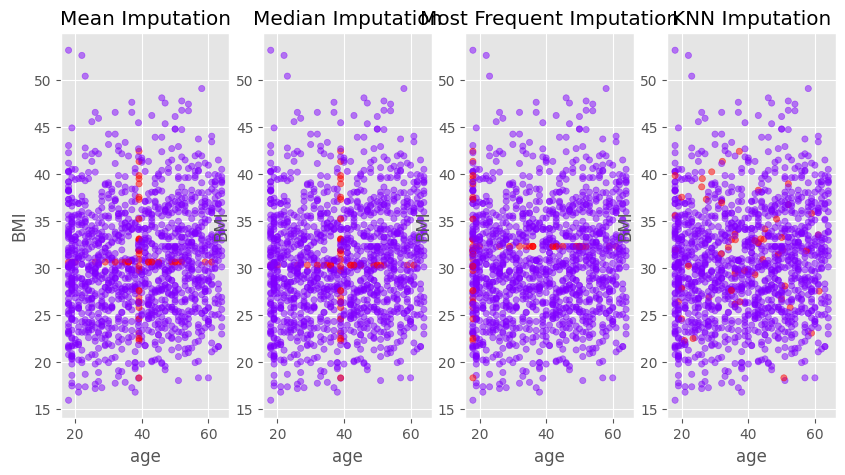

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5)) # creating 2 rows and 3 columns
nullity = Health_data['age'].isnull() + Health_data['BMI'].isnull() # creating null columns between culmen length and culmen depth
imputations = {'Mean Imputation': health_mean, # creating a python dictionary
               'Median Imputation': health_median,
               'Most Frequent Imputation': health_mode,
               'KNN Imputation': health_knn}

for ax, df_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[df_key].plot(x='age', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

*   we can see here that the distribution of data after imputation have better distribution.
*   So , we will use KNN imputation in our dataset.



In [ ]:
Health_data = health_knn

In [ ]:
Health_data.isna().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [ ]:
print(Health_data['gender'].value_counts())
print(Health_data['Children'].value_counts())
print(Health_data['location'].value_counts())
print(Health_data['smoking_status'].value_counts())

1.0    675
0.0    661
Name: gender, dtype: int64
0.0    574
1.0    323
2.0    239
3.0    157
4.0     25
5.0     18
Name: Children, dtype: int64
2.0    364
1.0    324
3.0    324
4.0    324
Name: location, dtype: int64
0.0    1063
1.0     273
Name: smoking_status, dtype: int64


In [ ]:
Health_data.describe()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1336.00000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.11990,0.50524,30.667334,1.094311,0.204341,2.485030,13268.527719
std,14.05076,0.50016,6.080906,1.206138,0.403370,1.104875,12112.797724
min,18.00000,0.00000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,26.00000,0.00000,26.308750,0.000000,0.000000,2.000000,4744.325050
50%,39.00000,1.00000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.00000,1.00000,34.585000,2.000000,0.000000,3.000000,16604.302645
max,64.00000,1.00000,53.130000,5.000000,1.000000,4.000000,63770.428010


storing Independent variables and dependent variables separately

In [ ]:
#features Column
X = Health_data.drop(['health_insurance_price'] , axis = 1)

In [ ]:
X

,age,gender,BMI,Children,smoking_status,location
0,19.0,0.0,26.426491,0.0,1.0,1.0
1,18.0,1.0,33.770000,1.0,0.0,2.0
2,28.0,1.0,33.000000,3.0,0.0,2.0
3,33.0,1.0,22.705000,0.0,0.0,3.0
4,32.0,1.0,28.880000,0.0,0.0,3.0
...,...,...,...,...,...,...
1333,50.0,1.0,30.970000,3.0,0.0,3.0
1334,18.0,0.0,31.920000,0.0,0.0,4.0
1335,18.0,0.0,36.850000,0.0,0.0,2.0
1336,21.0,0.0,25.800000,0.0,0.0,1.0


In [ ]:
#Target/Response Variable
y = Health_data['health_insurance_price']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1336, dtype: float64

*  we cannot see any high correlation between any two features.
*   So , we will not remove any feature

## Train/Test Split

1.   Splitting Dataset into two parts
2.   Train the Model on Training Set
3.   Test the Model on Testing set



In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2) #keeping 20% data for testing , 80% for training.

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1336, 6) (1068, 6) (268, 6)


In [ ]:
print(X_train)

            age  gender     BMI  Children  smoking_status  location
1333  50.000000     1.0  30.970       3.0             0.0       3.0
337   61.241102     1.0  27.550       1.0             0.0       3.0
909   19.945067     0.0  24.600       0.0             1.0       1.0
287   63.000000     0.0  26.220       0.0             0.0       3.0
132   53.000000     0.0  35.900       2.0             0.0       1.0
...         ...     ...     ...       ...             ...       ...
1184  23.000000     0.0  28.490       1.0             1.0       2.0
276   19.000000     1.0  20.615       2.0             0.0       3.0
790   39.000000     0.0  41.800       0.0             0.0       2.0
144   30.000000     1.0  28.690       3.0             1.0       3.0
339   46.000000     0.0  27.720       1.0             0.0       2.0

[1068 rows x 6 columns]


In [ ]:
print(y_train)

1333    10600.54830
337     13937.66650
909     17496.30600
287     14256.19280
132     11163.56800
           ...     
1184    18328.23810
276      2803.69785
790      5662.22500
144     20745.98910
339      8232.63880
Name: health_insurance_price, Length: 1068, dtype: float64


## Importing Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Model Training

In [ ]:
lr = LinearRegression()
lr.fit(X_train , y_train)
svm = SVR()
svm.fit(X_train , y_train)
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train , y_train)

GradientBoostingRegressor()

Prediction on Test Data

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'actual' : y_test, 'Lr' : y_pred1,
                  'svm' : y_pred2 , 'rf' : y_pred3 , 'gr' : y_pred4})

In [ ]:
df1

,actual,Lr,svm,rf,gr
84,39836.51900,32880.813749,9652.710042,40027.467585,38595.004613
579,3206.49135,2268.626532,9587.113458,6263.518170,3967.981407
619,10713.64400,13869.162801,9765.741598,16174.199834,12298.690281
1076,8551.34700,10538.758128,9716.611584,9643.513187,10222.172890
791,1252.40700,1456.842365,9568.757341,6789.886177,4443.700913
...,...,...,...,...,...
986,8410.04685,10435.148980,9689.241170,8881.190710,9369.472323
15,1837.23700,901.306163,9569.215604,2013.054212,3796.550010
1135,11085.58680,11452.172485,9733.932908,11503.565275,12243.264650
199,14901.51670,17733.157030,9802.484705,14424.504230,14447.494394


## Comparing Performance Visually

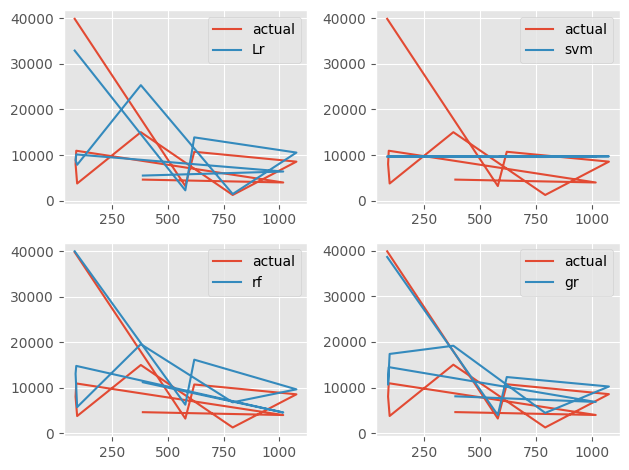

In [ ]:
plt.subplot(221)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['Lr'].iloc[0:11] , label = 'Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['svm'].iloc[0:11] , label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['rf'].iloc[0:11] , label = 'rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['gr'].iloc[0:11] , label = 'gr')

plt.tight_layout()
plt.legend()

Evaluating the Algorithm

we will evaluate our model using R2 , R2 is used to measure the goodness of fit , greater the value of R2 better the Regression model.

In [ ]:
#evaluating using metrics
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(y_test , y_pred1)
score2 = metrics.r2_score(y_test , y_pred2)
score3 = metrics.r2_score(y_test , y_pred3)
score4 = metrics.r2_score(y_test , y_pred4)

In [ ]:
print(score1,score2,score3,score4)

0.7716792983900093 -0.0442589116267047 0.857603603494151 0.8726766601575154


we can see that Model 4 is performing better than any other Model , that is Gradient Boosting Algorithm

In [ ]:
#evaluating using Mean Absolute Error
s1 = metrics.mean_absolute_error(y_test , y_pred1)
s2 = metrics.mean_absolute_error(y_test , y_pred2)
s3 = metrics.mean_absolute_error(y_test , y_pred3)
s4 = metrics.mean_absolute_error(y_test , y_pred4)

In [ ]:
print(s1,s2,s3,s4)

3981.603180534507 7995.383834715545 2638.387848305666 2612.1148863169697


Mean Absolute error is also used to measure the accuracy of Model

>> Here , the lower is better.
>> we can see here also Model 4(Gradient Boosting Regression Model) is performing better among all Models .

*  Conclusion :

Gradient Boosting Algorithm is giving best results.
So , we will use Gradient Boosting Algorithm for Model Deployment.

## Predicting house_insurance_price for new customer

In [ ]:
data = {'age' : 30.0,
        'gender' : 1 ,
        'BMI' : 30.97 ,
        'Children' : 1 ,
        'smoking_status' : 0,
        'location' : 3 }

df = pd.DataFrame(data , index = [0])
df

,age,gender,BMI,Children,smoking_status,location
0,30.0,1,30.97,1,0,3


In [ ]:
new_pred = gr.predict(df)
print(new_pred)

[6142.60197932]


**1- Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?**

Predictive models provide valuable insights into the factors that drive healthcare costs. This information can guide policymakers and insurance companies in making data-driven decisions to optimize insurance coverage, improve healthcare delivery systems, and develop preventive measures to reduce costs and improve health outcomes.

**2- If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?**

The proposed method for predicting health insurance costs can be helpful in the future for other types of insurance as well. While health insurance is the focus of this scenario, the overall approach of data analysis and machine learning can be applied to various insurance domains. Here's how the proposed method can be helpful for other types of insurance:

1. Property Insurance: Similar to health insurance, predicting property insurance costs accurately can aid in risk assessment and pricing. Factors such as location, property characteristics, and historical data can be analyzed to estimate the potential risks and determine appropriate insurance premiums.

2. Auto Insurance: Predicting auto insurance costs can involve analyzing various factors such as driver age, driving history, type of vehicle, and geographical location. By employing the proposed data analysis and machine learning techniques, insurers can better understand the risk profile of individual drivers and customize insurance policies accordingly.

3. Life Insurance: Predictive modeling can be employed in life insurance to assess the mortality risk and calculate appropriate premiums. Variables such as age, health status, lifestyle choices, and family medical history can be analyzed to estimate the likelihood of an insured individual's death and predict life insurance costs.

**3- Please aim to identify patterns in the data and important features that may impact an ML model.**

Smoking Status: Smoking is a well-known risk factor for various health issues. Individuals who smoke are generally more likely to experience health problems, leading to increased insurance costs.

Age: Age is often a significant factor in determining health insurance costs. Older individuals tend to have higher healthcare needs and may be more prone to chronic conditions, leading to higher insurance premiums.

Family Size: For family health insurance plans, the number of individuals covered can impact the overall cost. Larger families may have higher insurance premiums compared to individuals or smaller families.